# NYC yellow taxi data analysis

This project focuses on analyzing a Taxi Trip dataset to uncover insights and trends related to passenger behavior, trip characteristics, and payment patterns. The dataset includes various features such as the number of passengers, trip distance, payment type, fare amount, trip duration, and the time of day when the trips occurred. The primary goal is to process, clean, and explore this data to gain meaningful insights that can be used for decision-making and further analysis. At last will also create a model to predict Fare amount based on other features.

The analysis involves several key steps, including data loading, data cleaning, and transformation. The dataset contains both numerical and categorical variables, requiring different preprocessing techniques to ensure the data is ready for analysis. By examining patterns within the data, we aim to answer questions like: What times of day see the highest number of trips? How do payment methods vary across different trips? What are the characteristics of long versus short trips?

The project utilizes Python’s Pandas library for data manipulation, along with other tools and techniques necessary for handling real-world datasets. This report provides a detailed overview of the steps taken, including code snippets and explanations, to guide through the data analysis process

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import statsmodels.formula.api as smf

C:\Users\prath\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv("C:/Users/prath/Desktop/vizwiz-nyc-taxi-jan-2020/yellow_tripdata_2020-01.csv")

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [4]:
df.shape

(6405008, 18)

In [ ]:
# Our Hypothesis is for payment type and fare amount, columns which influences these things are necessary for our analysis

In [5]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [4]:
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])

In [5]:
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

In [8]:
df.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [9]:
df.isnull().sum()

VendorID                 65441
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          65441
trip_distance                0
RatecodeID               65441
store_and_fwd_flag       65441
PULocationID                 0
DOLocationID                 0
payment_type             65441
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
dtype: int64

In [6]:
len(df)

6405008

In [6]:
df['duration']= df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']
df.head()
df['duration']=df['duration'].dt.total_seconds()/60
# OR df['duration']=df['duration'].dt.seconds/60

In [7]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,31.000000
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,76.000000
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,27.833333
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,22.650000


In [35]:
df1=df[['passenger_count','payment_type', 'fare_amount', 'trip_distance', 'duration']]

In [36]:
df1

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.00,1.20,4.800000
1,1.0,1.0,7.00,1.20,7.416667
2,1.0,1.0,6.00,0.60,6.183333
3,1.0,1.0,5.50,0.80,4.850000
4,1.0,2.0,3.50,0.00,2.300000
...,...,...,...,...,...
6405003,NaN,NaN,17.59,3.24,31.000000
6405004,NaN,NaN,46.67,22.13,76.000000
6405005,NaN,NaN,48.85,10.51,27.833333
6405006,NaN,NaN,27.17,5.49,22.650000


In [37]:
print (len(df))
print (df1.isnull().sum())
#only 1% of the data is missing, so we can drop it

6405008
passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
duration               0
dtype: int64


In [40]:
df1.dropna(inplace=True)
print (df.isnull().sum())
print (df1.isnull().sum())

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
duration                 0
dtype: int64
passenger_count    0
payment_type       0
fare_amount        0
trip_distance      0
duration           0
dtype: int64


In [42]:
df1['passenger_count']=df1['passenger_count'].astype('int64')
df1['payment_type']=df1['payment_type'].astype('int64')
df1

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,1,6.0,1.20,4.800000
1,1,1,7.0,1.20,7.416667
2,1,1,6.0,0.60,6.183333
3,1,1,5.5,0.80,4.850000
4,1,2,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1,1,11.0,2.10,14.233333
6339563,1,1,13.0,2.13,19.000000
6339564,1,1,12.5,2.55,16.283333
6339565,1,2,8.5,1.61,9.633333


In [8]:
df[df.duplicated()] #No Duplicates

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
6345634,NaN,2020-01-06 06:14:00,2020-01-06 07:03:00,NaN,21.69,NaN,NaN,72,116,NaN,47.08,2.75,0.5,0.0,6.12,0.3,56.75,0.0,49.000000
6345636,NaN,2020-01-06 06:52:00,2020-01-06 07:25:00,NaN,10.45,NaN,NaN,89,68,NaN,32.27,2.75,0.5,0.0,6.12,0.3,41.94,0.0,33.000000
6345638,NaN,2020-01-06 06:10:00,2020-01-06 06:46:29,NaN,8.70,NaN,NaN,76,45,NaN,38.27,2.75,0.0,0.0,0.00,0.3,41.32,0.0,36.483333
6345640,NaN,2020-01-06 06:11:00,2020-01-06 06:42:00,NaN,6.64,NaN,NaN,213,152,NaN,18.66,2.75,0.5,0.0,6.12,0.3,28.33,0.0,31.000000
6345642,NaN,2020-01-06 06:30:00,2020-01-06 07:11:00,NaN,12.76,NaN,NaN,169,249,NaN,51.05,2.75,0.5,0.0,0.00,0.3,54.60,0.0,41.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6373809,NaN,2020-01-12 23:07:00,2020-01-12 23:19:00,NaN,5.93,NaN,NaN,52,14,NaN,20.87,2.75,0.5,0.0,0.00,0.3,24.42,0.0,12.000000
6373811,NaN,2020-01-12 23:19:00,2020-01-12 23:38:00,NaN,7.99,NaN,NaN,242,42,NaN,25.88,2.75,0.5,0.0,0.00,0.3,29.43,0.0,19.000000
6373813,NaN,2020-01-12 23:25:00,2020-01-12 23:56:00,NaN,-20.94,NaN,NaN,86,170,NaN,54.01,2.75,0.5,0.0,6.12,0.3,63.68,0.0,31.000000
6373815,NaN,2020-01-12 23:29:22,2020-01-12 23:45:44,NaN,3.37,NaN,NaN,107,256,NaN,24.06,2.75,0.0,0.0,0.00,0.3,27.11,0.0,16.366667


In [48]:
df1[df1.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
2056,1,2,7.0,0.00,0.000000
2441,1,1,52.0,0.00,0.200000
2446,2,1,9.5,1.70,13.066667
2465,1,1,4.0,0.40,3.083333
3344,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000
6339559,1,1,8.5,1.81,8.016667
6339560,1,2,6.5,0.98,6.900000
6339562,1,1,11.0,2.10,14.233333


In [9]:
#df1.drop_duplicates(inplace=True)
df.drop_duplicates(inplace=True)

In [15]:
len(df1)

In [ ]:
# We want to consider only cards and cash in payments type

In [54]:
df1=df1[df1['payment_type']<3]

In [56]:
# Now we will remove outliers

In [60]:
df1=df1[(df1['passenger_count']<7) & (df1['passenger_count']>0)]
df1['passenger_count'].value_counts()

passenger_count
1    1720358
2     565797
3     197946
5     188786
6     117875
4     107396
Name: count, dtype: int64

In [61]:
df1['payment_type'].replace([1,2],['card','cash'],inplace=True)

In [63]:
df1.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.898158e+06,2.898158e+06,2.898158e+06,2.898158e+06
mean,1.906919e+00,1.761232e+01,4.479349e+00,2.402879e+01
std,1.427756e+00,1.495772e+01,4.867743e+00,9.293099e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,8.500000e+00,1.470000e+00,9.716667e+00
50%,1.000000e+00,1.300000e+01,2.690000e+00,1.553333e+01
75%,2.000000e+00,2.100000e+01,5.370000e+00,2.318333e+01
max,6.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [64]:
# Will remove negative values from fare amount, trip distance and duration

In [65]:
df1=df1[(df1['fare_amount']>0) & (df1['trip_distance']>0) & (df1['duration']>0)]

In [66]:
df1.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.866585e+06,2.866585e+06,2.866585e+06,2.866585e+06
mean,1.913070e+00,1.747778e+01,4.523730e+00,2.405541e+01
std,1.431386e+00,1.437862e+01,4.869850e+00,9.305349e+01
min,1.000000e+00,1.000000e-02,1.000000e-02,1.666667e-02
25%,1.000000e+00,8.500000e+00,1.500000e+00,9.783333e+00
50%,1.000000e+00,1.300000e+01,2.710000e+00,1.556667e+01
75%,2.000000e+00,2.050000e+01,5.410000e+00,2.313333e+01
max,6.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


Data Cleaning:

The data was then cleaned. Following things were done for the process of cleaning:

Taking only positive values and Null values were removed in Trip distance, Tip Amount, Total Amount and Fare Amount.
Since the number of data points are very hiwe will use interquartile range for removing outliersliers

In [67]:
#Will check for outliers and distribution of the data

<Axes: ylabel='fare_amount'>

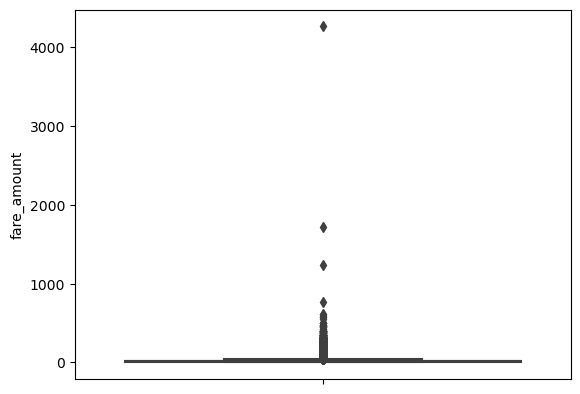

In [77]:
sns.boxplot(y='fare_amount',data=df1)

(array([2.866566e+06, 1.600000e+01, 1.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([1.000000e-02, 4.265090e+02, 8.530080e+02, 1.279507e+03,
        1.706006e+03, 2.132505e+03, 2.559004e+03, 2.985503e+03,
        3.412002e+03, 3.838501e+03, 4.265000e+03]),
 <BarContainer object of 10 artists>)

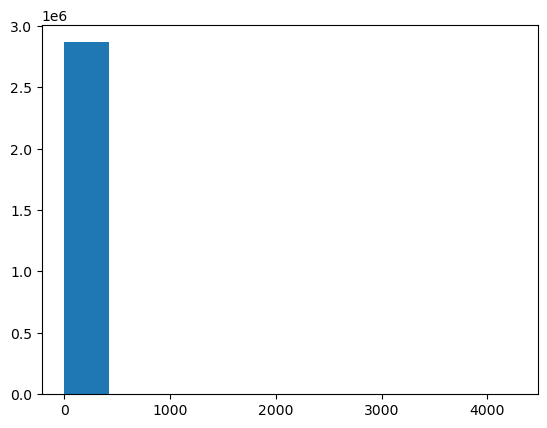

In [74]:
plt.hist(df1['fare_amount'])

<Axes: xlabel='fare_amount', ylabel='Density'>

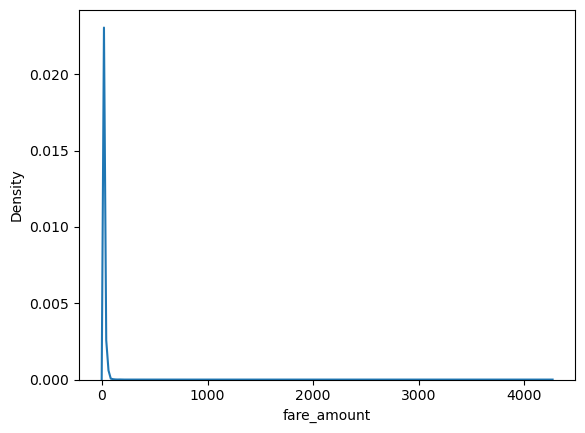

In [78]:
sns.kdeplot(data=df1,x='fare_amount')
plt.show()

In [76]:
#let's remove outliers

,passenger_count,payment_type,fare_amount,trip_distance,duration


In [79]:
for col in ['fare_amount','trip_distance','duration']:
    lower_quartile=df1[col].quantile(0.25)
    upper_quartile=df1[col].quantile(0.75)
    IQR= upper_quartile-lower_quartile
    lower_bound=lower_quartile-1.5*IQR
    upper_bound=upper_quartile+1.5*IQR
    df1=df1[(df1[col]>=lower_bound) & (df1[col]<=upper_bound)]
    

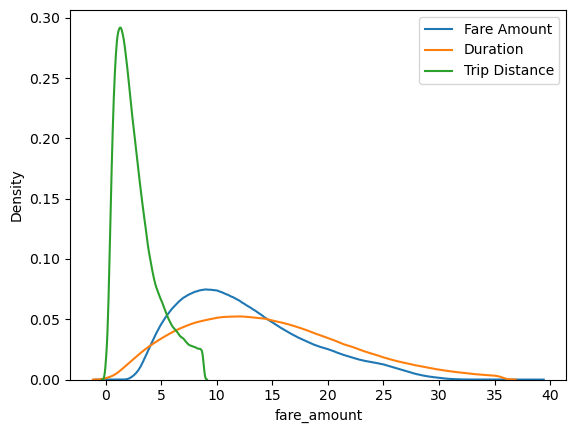

In [83]:
sns.kdeplot(data=df1,x='fare_amount', label='Fare Amount')
sns.kdeplot(data=df1,x='duration', label='Duration')
sns.kdeplot(data=df1,x='trip_distance', label='Trip Distance')
plt.legend()

In [84]:
df1

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,card,6.0,1.20,4.800000
1,1,card,7.0,1.20,7.416667
2,1,card,6.0,0.60,6.183333
3,1,card,5.5,0.80,4.850000
5,1,cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,card,10.5,2.40,12.383333
6339555,3,card,10.0,2.09,14.800000
6339561,1,card,17.5,4.11,21.500000
6339563,1,card,13.0,2.13,19.000000


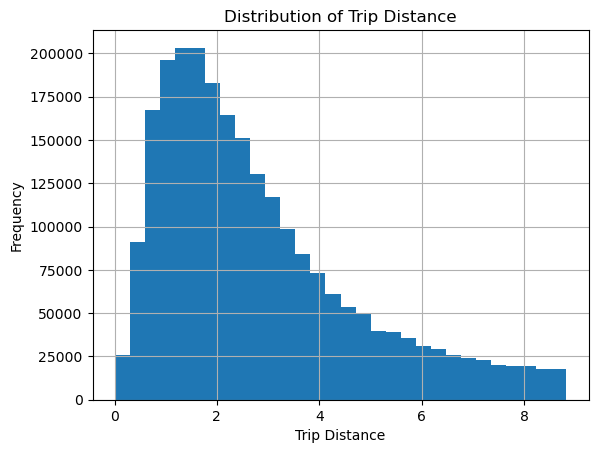

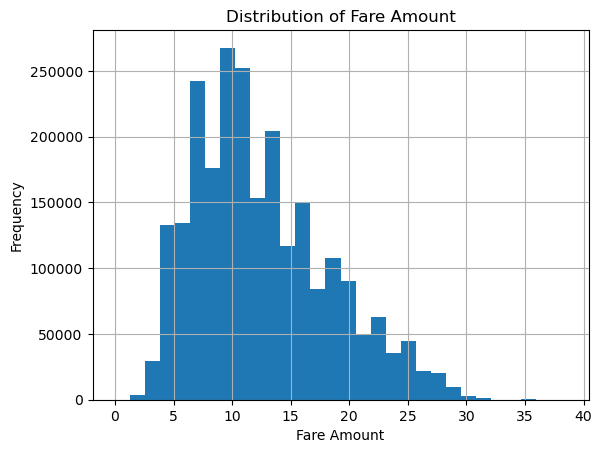

In [90]:
df1['trip_distance'].hist(bins=30)
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Distance')
plt.show()

df1['fare_amount'].hist(bins=30)
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Fare Amount')
plt.show()

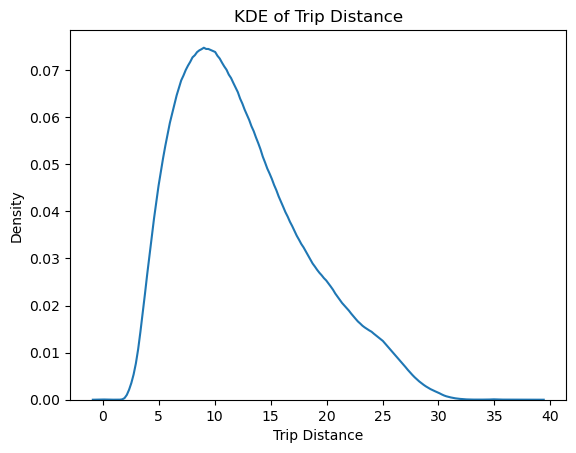

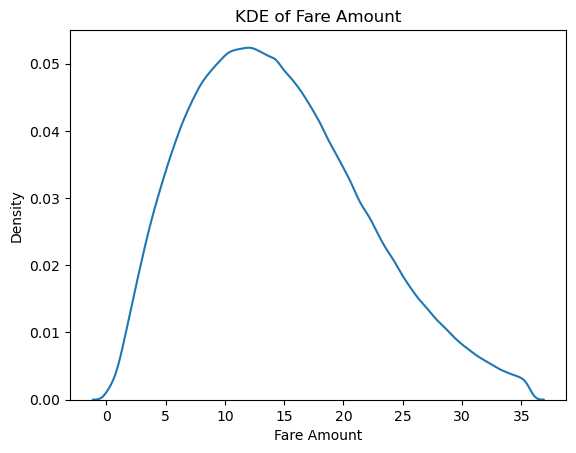

In [91]:
sns.kdeplot(data=df1,x='fare_amount', label='Fare Amount')
plt.xlabel('Trip Distance')
plt.title('KDE of Trip Distance')
plt.show()

sns.kdeplot(data=df1,x='duration', label='Duration')
plt.xlabel('Fare Amount')
plt.title('KDE of Fare Amount')
plt.show()

In [93]:
#If we want to check distribustion payment_type wise

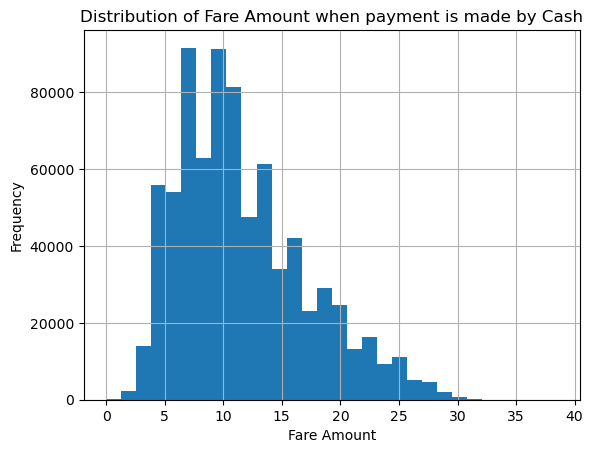

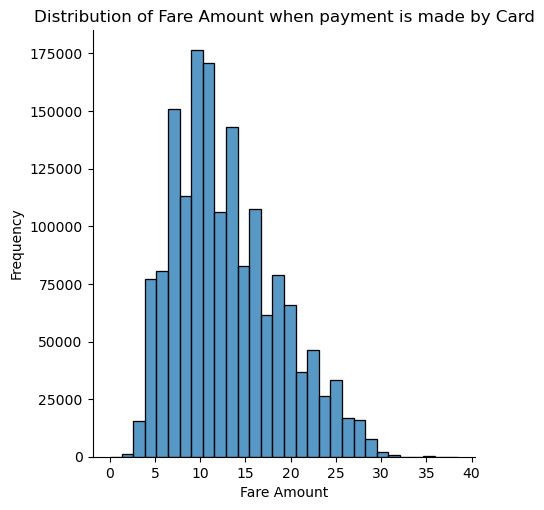

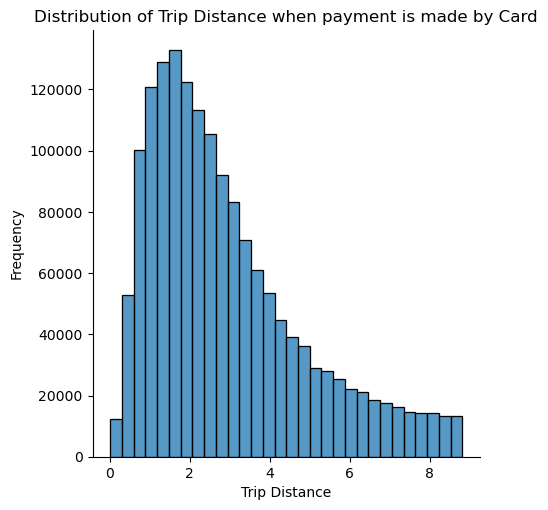

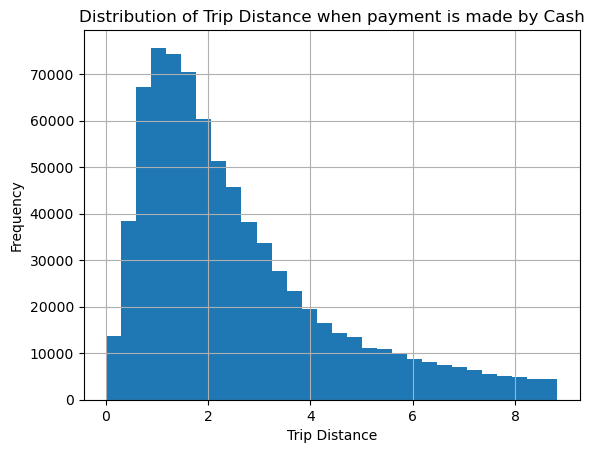

In [101]:
(df1[df1['payment_type']=='cash'])['fare_amount'].hist(bins=30)
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Fare Amount when payment is made by Cash')
plt.show()
sns.displot((df1[df1['payment_type']=='card'])['fare_amount'],bins=30)
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Fare Amount when payment is made by Card')
plt.show()
sns.displot((df1[df1['payment_type']=='card'])['trip_distance'],bins=30)
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Distance when payment is made by Card')
plt.show()
(df1[df1['payment_type']=='cash'])['trip_distance'].hist(bins=30)
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Distance when payment is made by Cash')
plt.show()


In [112]:
print ("Mean of Fare amount when payment is made by  Card :")
print((df1[df1['payment_type']=='card'])['fare_amount'].mean())
print ("Mean of Fare amount when payment is made by  Cash :")
print((df1[df1['payment_type']=='cash'])['fare_amount'].mean())
print ("Mean of Trip Distance when payment is made by  Card :")
print((df1[df1['payment_type']=='card'])['trip_distance'].mean())
print ("Mean of Trip Distance when payment is made by  Cash :")
print((df1[df1['payment_type']=='cash'])['trip_distance'].mean())

Mean of Fare amount when payment is made by  Card :
12.921629663145268
Mean of Fare amount when payment is made by  Cash :
11.634798765351157
Mean of Trip Distance when payment is made by  Card :
2.930817161870395
Mean of Trip Distance when payment is made by  Cash :
2.5620720091840186


In [109]:
print ("Standard Deviation of Fare amount when payment is made by  Card :")
print((df1[df1['payment_type']=='card'])['fare_amount'].std())
print ("Standard Deviation of Fare amount when payment is made by  Cash:")
print((df1[df1['payment_type']=='cash'])['fare_amount'].std())
print ("Standard Deviation of Trip Distance when payment is made by  Card :")
print((df1[df1['payment_type']=='card'])['trip_distance'].std())
print ("Standard Deviation of Trip Distance when payment is made by  Cash :")
print((df1[df1['payment_type']=='cash'])['trip_distance'].std())

Standard Deviation of Fare amount when payment is made by  Card :
5.77683461398579
Standard Deviation of Fare amount when payment is made by  Cash:
5.546693615039655
Standard Deviation of Trip Distance when payment is made by  Card :
1.9556017478934495
Standard Deviation of Trip Distance when payment is made by  Cash :
1.8812170288649899


In [ ]:
# As the distance or fare amount increases, customers prefered to make the payment by card

Text(0.5, 1.0, 'Distribution of Payment Types')

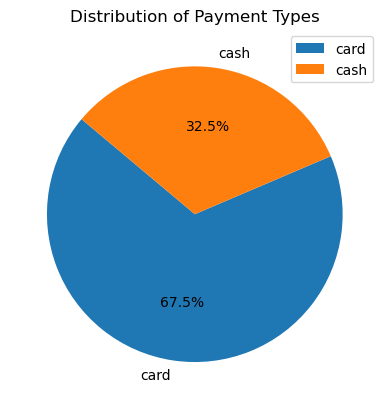

In [120]:
plt.pie(df1['payment_type'].value_counts(normalize=True),labels=df1['payment_type'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.legend()
plt.title('Distribution of Payment Types')

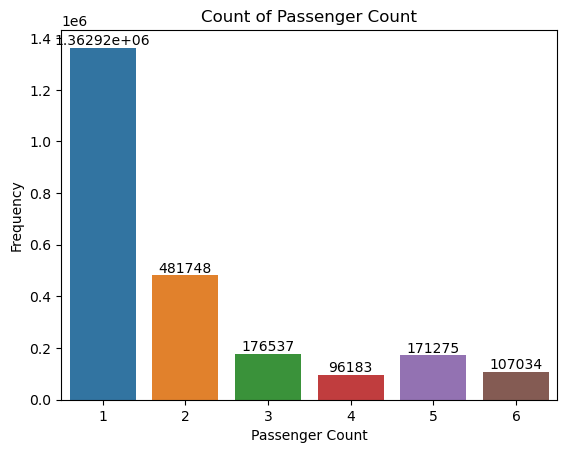

<Figure size 640x480 with 0 Axes>

In [125]:
ax=sns.countplot(x='passenger_count', data =df1 )
ax.bar_label(ax.containers[0]) #for data labels
plt.title('Count of Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.show()

In [123]:
df1['passenger_count'].value_counts()

passenger_count
1    1362915
2     481748
3     176537
5     171275
6     107034
4      96183
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1184095b3d0>,
 [Text(-0.30604502901772196, 1.0565682373673466, '1'),
  Text(-0.4085932093787255, -1.0212989715306646, '2'),
  Text(0.4937267980409303, -0.9829719471563014, '3'),
  Text(0.8457835251245353, -0.7033137483569584, '5'),
  Text(1.025601334738349, -0.39767059506948366, '6'),
  Text(1.0922174245934964, -0.13061813585544008, '4')],
 [Text(-0.1669336521914847, 0.5763099476549163, '59.0%'),
  Text(-0.22286902329748662, -0.5570721662894533, '19.9%'),
  Text(0.2693055262041438, -0.5361665166307098, '7.0%'),
  Text(0.4613364682497464, -0.3836256809219773, '6.1%'),
  Text(0.5594189098572813, -0.2169112336742638, '4.2%'),
  Text(0.5957549588691798, -0.07124625592114912, '3.8%')])

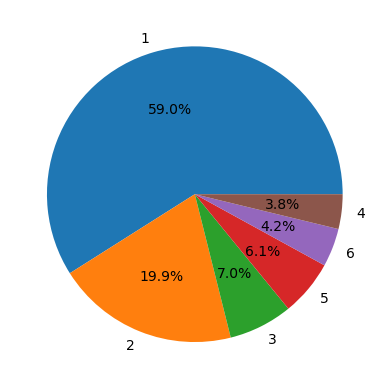

In [132]:
plt.pie((df1[(df1['payment_type']=='cash')])['passenger_count'].value_counts(), labels=df1['passenger_count'].value_counts().index,autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x11840b23990>,
 [Text(-0.20231902970313426, 1.0812340219489869, '1'),
  Text(-0.5903508045497233, -0.9281626622351787, '2'),
  Text(0.33361606574287744, -1.0481890672384655, '3'),
  Text(0.7779922367321405, -0.7776426425965343, '5'),
  Text(1.0142866415564513, -0.42570248855290355, '6'),
  Text(1.0916380935886358, -0.13537456417720767, '4')],
 [Text(-0.11035583438352776, 0.5897640119721747, '55.9%'),
  Text(-0.3220095297543945, -0.5062705430373702, '20.2%'),
  Text(0.18197239949611493, -0.5717394912209811, '7.6%'),
  Text(0.42435940185389476, -0.4241687141435641, '7.5%'),
  Text(0.5532472590307916, -0.2322013573924928, '4.8%'),
  Text(0.5954389601392558, -0.07384067136938599, '3.9%')])

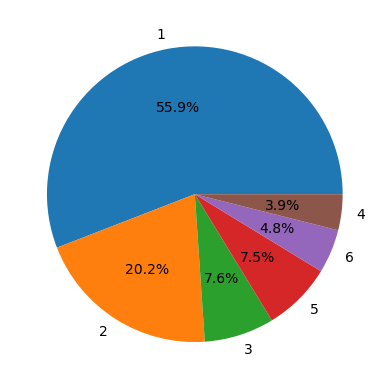

In [133]:
plt.pie((df1[(df1['payment_type']=='card')])['passenger_count'].value_counts(), labels=df1['passenger_count'].value_counts().index,autopct='%1.1f%%')

In [145]:
pass_count_perc=df1.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
pass_count_perc.rename(columns={'passenger_count':'count'}, inplace=True)
pass_count_perc['percentage']=(pass_count_perc['count']/ pass_count_perc['count'].sum())*100
pass_count_perc

count  percentage
payment_type passenger_count                    
card         1                904168   37.741413
             2                326663   13.635434
             3                122139    5.098276
             4                 63537    2.652136
             5                123749    5.165480
             6                 77563    3.237603
cash         1                458747   19.148830
             2                155085    6.473495
             3                 54398    2.270659
             4                 32646    1.362696
             5                 47526    1.983811
             6                 29471    1.230166

In [156]:
pass_count_perc.reset_index(inplace=True)

<Axes: xlabel='passenger_count', ylabel='percentage'>

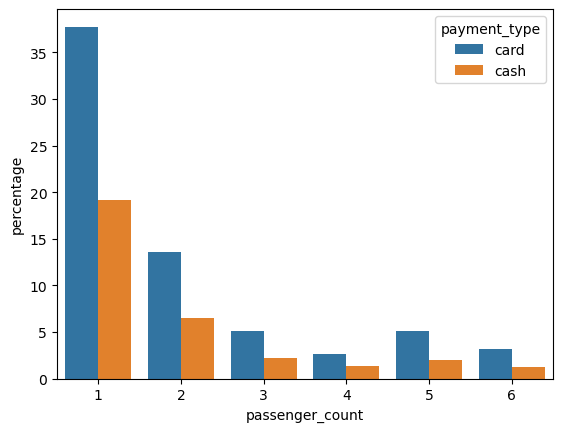

In [158]:
sns.barplot(data=pass_count_perc,x='passenger_count' ,y='percentage', hue='payment_type')

In [ ]:
# If we take cash and card both 100% in their own category

In [168]:
total_counts = pass_count_perc.groupby('payment_type')['count'].transform('sum')

# Calculate percentage of count within each payment type
pass_count_perc['perc_in_own_category'] = pass_count_perc['count'] / total_counts * 100

In [169]:
pass_count_perc

,payment_type,passenger_count,count,percentage,perc_in_own_category
0,card,1,904168,37.741413,55.888081
1,card,2,326663,13.635434,20.191567
2,card,3,122139,5.098276,7.549608
3,card,4,63537,2.652136,3.927324
4,card,5,123749,5.165480,7.649125
5,card,6,77563,3.237603,4.794294
6,cash,1,458747,19.148830,58.974537
7,cash,2,155085,6.473495,19.937059
8,cash,3,54398,2.270659,6.993172
9,cash,4,32646,1.362696,4.196829


<Axes: xlabel='passenger_count', ylabel='perc_in_own_category'>

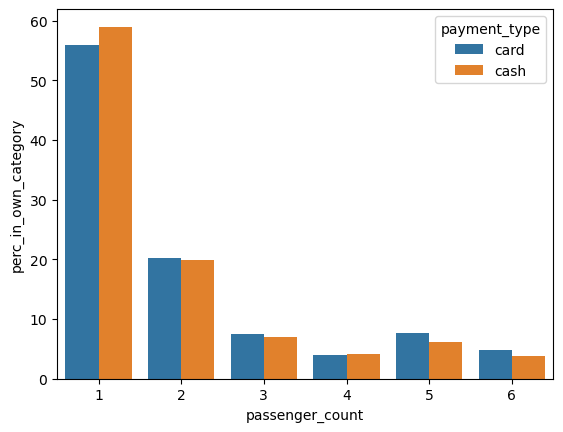

In [170]:
sns.barplot(data=pass_count_perc,x='passenger_count' ,y='perc_in_own_category', hue='payment_type')

In [175]:
# Null Hypothesis: There is no difference in average fare between customers who use credit cards and customers who use cash
# Alternative Hypothesis: There is a significant difference in average fare between customers who use credit cards and customers who use cash

In [ ]:
# Check if our fare is normally distributed or not using QQ plot

In [178]:
import statsmodels.api as sm

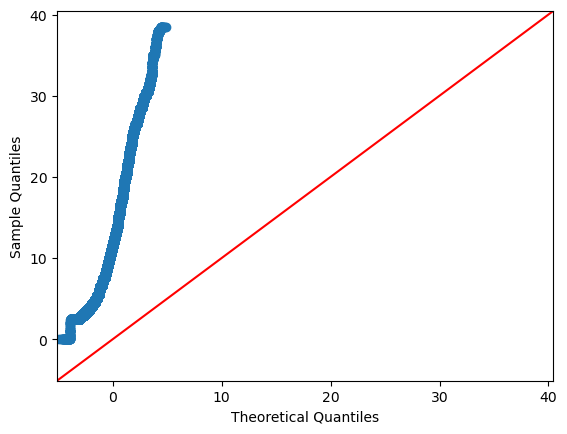

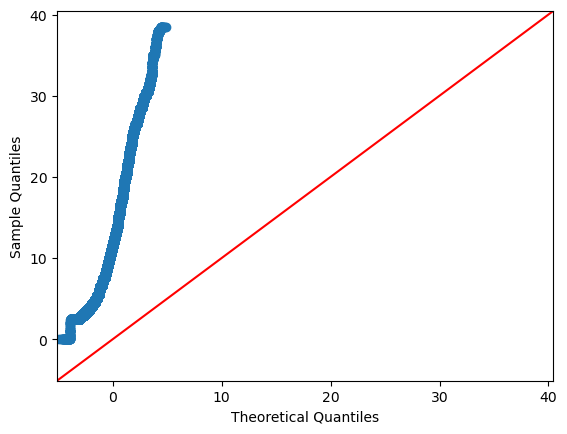

In [181]:
sm.qqplot(df1['fare_amount'], line='45')
# Line is not at all alligned with diagonal, Data is not normally distributed

In [184]:
card_sample=df1[df1['payment_type']=='card']['fare_amount']
cash_sample=df1[df1['payment_type']=='cash']['fare_amount']

In [185]:
t_stat, p_val=st.ttest_ind(a=card_sample,b=cash_sample,equal_var=False)
print("T-statistic-",t_stat, "P-Value-", p_val)

T-statistic- 165.88209403802514 P-Value- 0.0


In [ ]:
#Will reject our null hypothesis
# If data id not normal You should use Non-parametric test

In [188]:
stat, p = st.mannwhitneyu(card_sample, cash_sample)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=714031552642.500, p=0.000


In [ ]:
#From this also we can reject the null

In [10]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,31.000000
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,76.000000
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,27.833333
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,22.650000


In [ ]:
#It is taking too much time to run
'''def time_of_the_day(time):
    if ((time >= pd.to_datetime('07:00:00').time()) & (time < pd.to_datetime('12:00:00').time())):
        return 'Morning'
    elif ((time >= pd.to_datetime('12:00:00').time()) & (time < pd.to_datetime('17:00:00').time())):
        return 'Afternoon'
    elif ((time >= pd.to_datetime('17:00:00').time()) & (time < pd.to_datetime('22:00:00').time())):
        return 'Evening'
    elif ((time >= pd.to_datetime('22:00:00').time()) or (time < pd.to_datetime('04:00:00').time())):
        return 'Night'
    else :
        return 'Early Morning'

df['times_of_day']=df['tpep_pickup_datetime'].dt.time.apply(time_of_the_day)'''

In [11]:
df['hour'] = df['tpep_pickup_datetime'].dt.hour

# Define conditions and choices for different times of the day
conditions = [
    (df['hour'] >= 7) & (df['hour'] < 12),
    (df['hour'] >= 12) & (df['hour'] < 17),
    (df['hour'] >= 17) & (df['hour'] < 22),
    (df['hour'] >= 22) | (df['hour'] < 4),
    (df['hour'] >= 4) & (df['hour'] < 7)
]

choices = ['Morning', 'Afternoon', 'Evening', 'Night', 'Early Morning']

# Apply the conditions to create a new column
df['times_of_day'] = np.select(conditions, choices)

df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration,hour,times_of_day
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,...,3.00,0.5,1.47,0.00,0.3,11.27,2.5,4.800000,0,Night
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,...,3.00,0.5,1.50,0.00,0.3,12.30,2.5,7.416667,0,Night
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,...,3.00,0.5,1.00,0.00,0.3,10.80,2.5,6.183333,0,Night
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,...,0.50,0.5,1.36,0.00,0.3,8.16,0.0,4.850000,0,Night
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,...,0.50,0.5,0.00,0.00,0.3,4.80,0.0,2.300000,0,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,...,2.75,0.5,0.00,0.00,0.3,21.14,0.0,31.000000,22,Night
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,...,2.75,0.5,0.00,12.24,0.3,62.46,0.0,76.000000,22,Night
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,...,2.75,0.0,0.00,0.00,0.3,51.90,0.0,27.833333,22,Night
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,...,2.75,0.0,0.00,0.00,0.3,30.22,0.0,22.650000,22,Night


In [18]:
df.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
duration                        float64
hour                              int32
times_of_day                     object
dtype: object

In [13]:
df.dropna(inplace=True)

In [14]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration,hour,times_of_day
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,...,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.800000,0,Night
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,...,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.416667,0,Night
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,...,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.183333,0,Night
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,...,0.5,0.5,1.36,0.0,0.3,8.16,0.0,4.850000,0,Night
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,...,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2.300000,0,Night


In [15]:
df['times_of_day'].value_counts()

times_of_day
Evening          1925702
Afternoon        1771767
Morning          1440984
Night             981705
Early Morning     219409
Name: count, dtype: int64

Text(0, 0.5, 'Passenger Frequency')

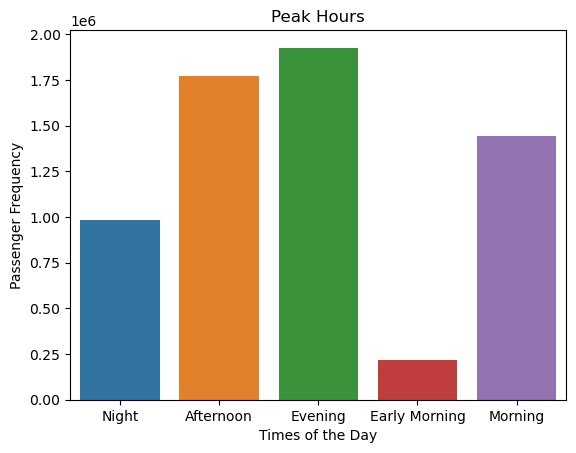

In [22]:
sns.countplot(data=df, x='times_of_day')
plt.title('Peak Hours')
plt.xlabel('Times of the Day')
plt.ylabel('Passenger Frequency')

In [16]:
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

In [17]:
df['pickup_dayofweek'].value_counts()

pickup_dayofweek
4    1113011
3    1096652
2    1041862
1     838441
5     808834
0     731869
6     708898
Name: count, dtype: int64

Text(0, 0.5, 'Passenger Frequency')

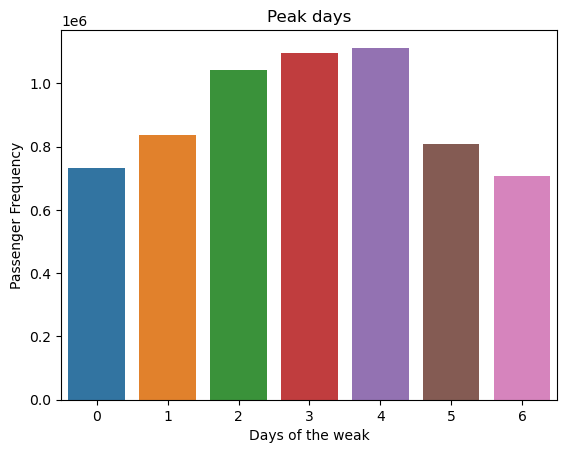

In [18]:
sns.countplot(data=df, x='pickup_dayofweek')
plt.title('Peak days')
plt.xlabel('Days of the weak')
plt.ylabel('Passenger Frequency')
# 0-Monday

In [21]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'duration', 'hour',
       'times_of_day', 'pickup_hour', 'pickup_dayofweek', 'pickup_month'],
      dtype='object')

In [19]:
df['passenger_count']=df['passenger_count'].astype('int64')
df['payment_type']=df['payment_type'].astype('int64')
df['VendorID']=df['VendorID'].astype('int64')
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
duration                        float64
hour                              int32
times_of_day                     object
pickup_hour                       int32
pickup_dayofweek                  int32
pickup_month                      int32
dtype: object

In [20]:
df=df[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'duration',
       'times_of_day', 'pickup_hour', 'pickup_dayofweek']]
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,duration,times_of_day,pickup_hour,pickup_dayofweek
0,2020-01-01 00:28:15,2020-01-01 00:33:03,1,1.2,1.0,238,239,1,6.0,3.0,4.800000,Night,0,2
1,2020-01-01 00:35:39,2020-01-01 00:43:04,1,1.2,1.0,239,238,1,7.0,3.0,7.416667,Night,0,2
2,2020-01-01 00:47:41,2020-01-01 00:53:52,1,0.6,1.0,238,238,1,6.0,3.0,6.183333,Night,0,2
3,2020-01-01 00:55:23,2020-01-01 01:00:14,1,0.8,1.0,238,151,1,5.5,0.5,4.850000,Night,0,2
4,2020-01-01 00:01:58,2020-01-01 00:04:16,1,0.0,1.0,193,193,2,3.5,0.5,2.300000,Night,0,2


In [21]:
df=df[(df['extra']>=0) & (df['extra']<7.1)]
df['extra'].value_counts().sort_values()
# Rush hour and Overnight charges

extra
1.75          1
1.02          1
0.22          1
0.02          1
2.95          1
2.15          1
0.52          1
0.01          1
5.30          5
5.00          5
2.80          8
0.30         33
2.00         60
1.80        178
1.30        268
0.80        621
7.00       7676
4.50      21631
3.50     366557
3.00     506444
1.00     758012
2.50    1058585
0.50    1216847
0.00    2393274
Name: count, dtype: int64

In [22]:
df=df[df['RatecodeID']<7]
df['RatecodeID'].value_counts()

RatecodeID
1.0    6117498
2.0     157487
5.0      36295
3.0      13414
4.0       5123
6.0         46
Name: count, dtype: int64

In [23]:
df=df[(df['passenger_count']<7) & (df['passenger_count']>0)]
df['passenger_count'].value_counts()

passenger_count
1    4539964
2     944965
3     249846
5     225462
6     132082
4     123266
Name: count, dtype: int64

In [24]:
df=df[(df['fare_amount']>0) & (df['trip_distance']>0) & (df['duration']>0)]
df.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,duration,pickup_hour,pickup_dayofweek
count,6141073,6141073,6.141073e+06,6.141073e+06,6.141073e+06,6.141073e+06,6.141073e+06,6.141073e+06,6.141073e+06,6.141073e+06,6.141073e+06,6.141073e+06,6.141073e+06
mean,2020-01-17 03:30:12.434147584,2020-01-17 03:46:09.256380672,1.546162e+00,2.883791e+00,1.040944e+00,1.651035e+02,1.629279e+02,1.261425e+00,1.240864e+01,1.080823e+00,1.594704e+01,1.392010e+01,2.992452e+00
min,2008-12-31 23:02:40,2008-12-31 23:32:32,1.000000e+00,1.000000e-02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,0.000000e+00,1.666667e-02,0.000000e+00,0.000000e+00
25%,2020-01-09 17:37:12,2020-01-09 17:53:18,1.000000e+00,9.900000e-01,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,6.433333e+00,1.000000e+01,2.000000e+00
50%,2020-01-17 00:08:29,2020-01-17 00:25:09,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,1.046667e+01,1.500000e+01,3.000000e+00
75%,2020-01-24 18:41:07,2020-01-24 18:56:35,2.000000e+00,2.900000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.350000e+01,2.500000e+00,1.668333e+01,1.900000e+01,4.000000e+00
max,2021-01-02 01:12:10,2021-01-02 01:25:01,6.000000e+00,2.628800e+02,6.000000e+00,2.650000e+02,2.650000e+02,4.000000e+00,4.265000e+03,7.000000e+00,8.525117e+03,2.300000e+01,6.000000e+00
std,NaN,NaN,1.146660e+00,3.765440e+00,2.817482e-01,6.531264e+01,6.969236e+01,4.548308e-01,1.128995e+01,1.237908e+00,6.413149e+01,5.888191e+00,1.850328e+00


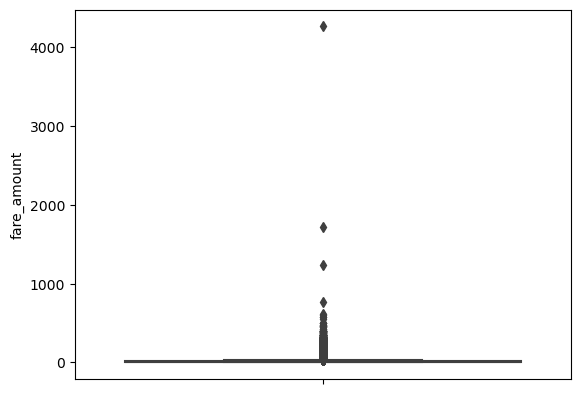

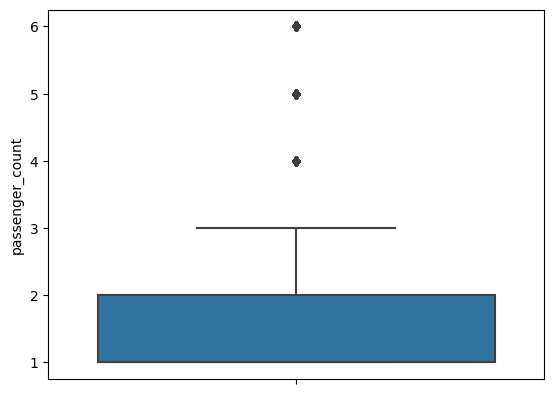

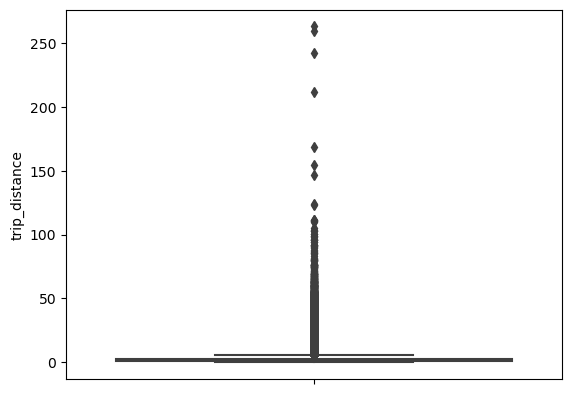

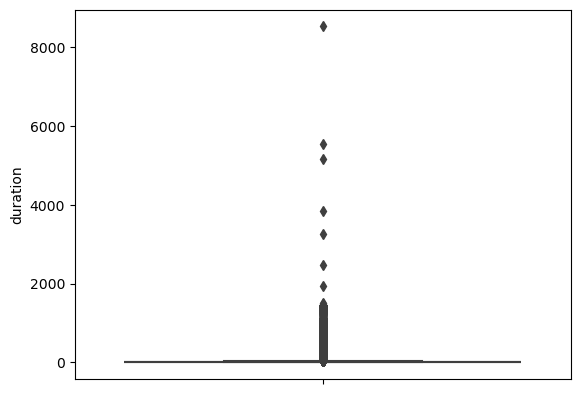

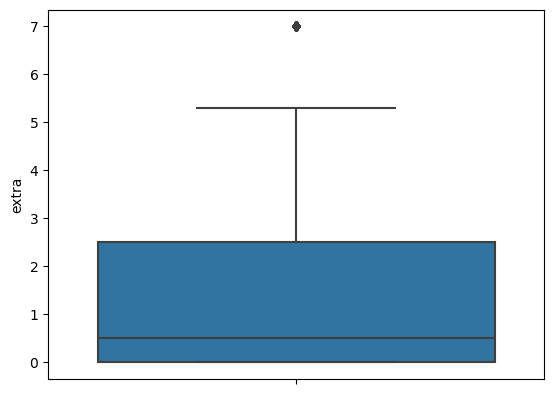

In [25]:
sns.boxplot(y='fare_amount',data=df)
plt.show()
sns.boxplot(y='passenger_count',data=df)
plt.show()
sns.boxplot(y='trip_distance',data=df)
plt.show()
sns.boxplot(y='duration',data=df)
plt.show()
sns.boxplot(y='extra',data=df)
plt.show()

In [78]:
#len(df[df['fare_amount']>55])
#len(df[df['trip_distance']>20])
len(df[df['duration']>50])
#(df[(df['duration']>75) & (df['duration']<100)])[['fare_amount','duration','passenger_count','trip_distance','payment_type']]

54146

In [26]:
# Will  remove outliers now, Manually
'''for col in ['fare_amount','duration']:
    lower_quartile=df[col].quantile(0.25)
    upper_quartile=df[col].quantile(0.75)
    IQR= upper_quartile-lower_quartile
    lower_bound=lower_quartile-1.5*IQR
    upper_bound=upper_quartile+1.5*IQR
    df=df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]'''

df=df[df['trip_distance']<20]
df=df[df['fare_amount']<55]
df=df[df['duration']<60]

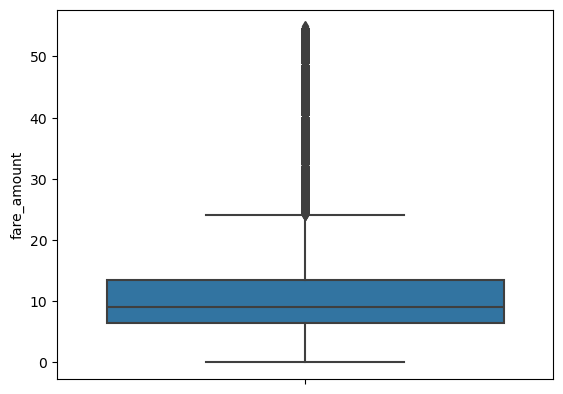

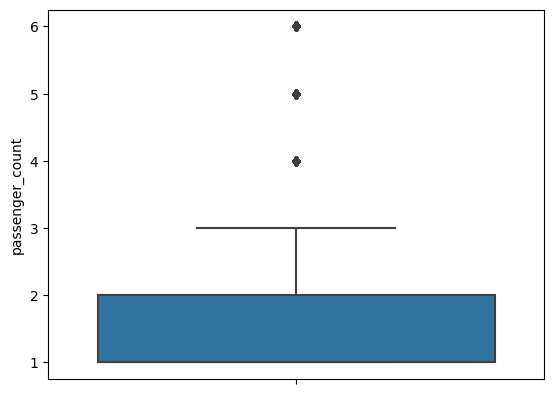

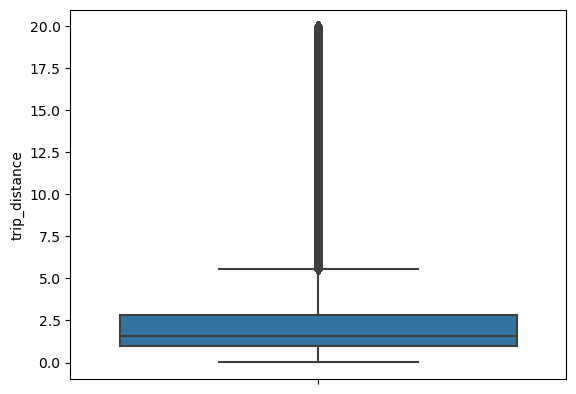

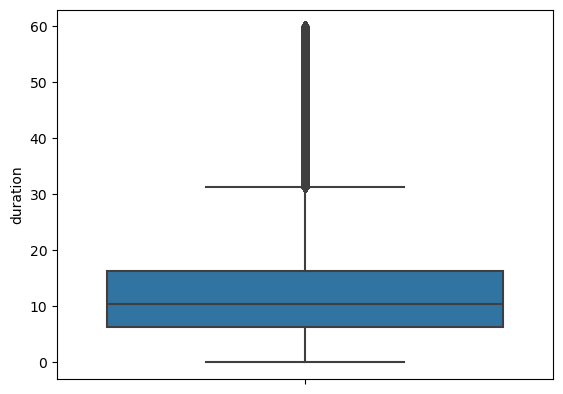

In [27]:
sns.boxplot(y='fare_amount',data=df)
plt.show()
sns.boxplot(y='passenger_count',data=df)
plt.show()
sns.boxplot(y='trip_distance',data=df)
plt.show()
sns.boxplot(y='duration',data=df)
plt.show()

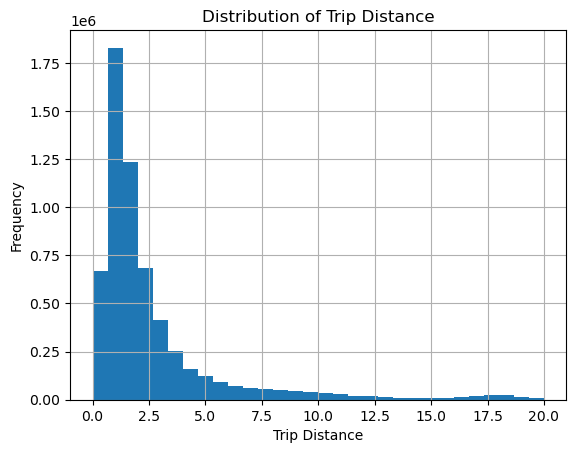

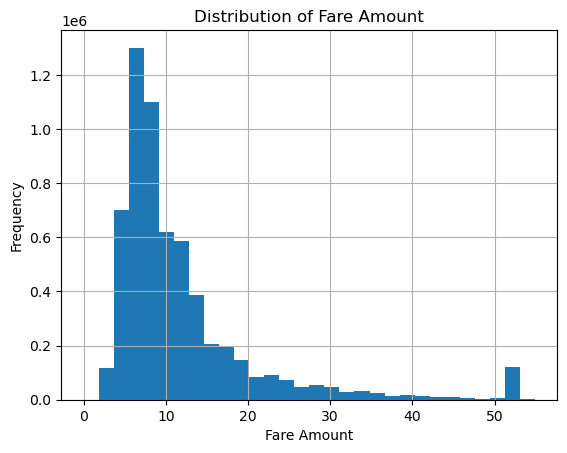

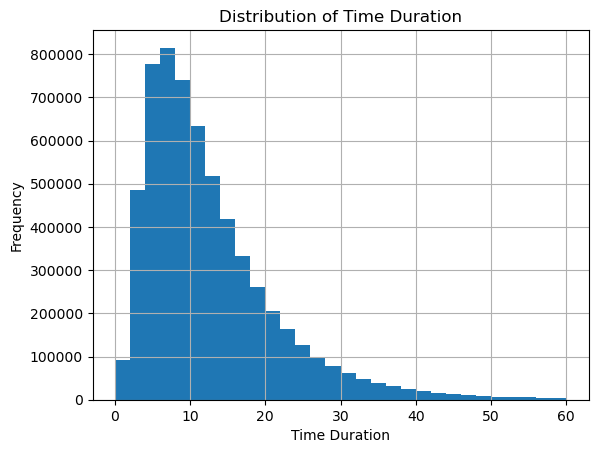

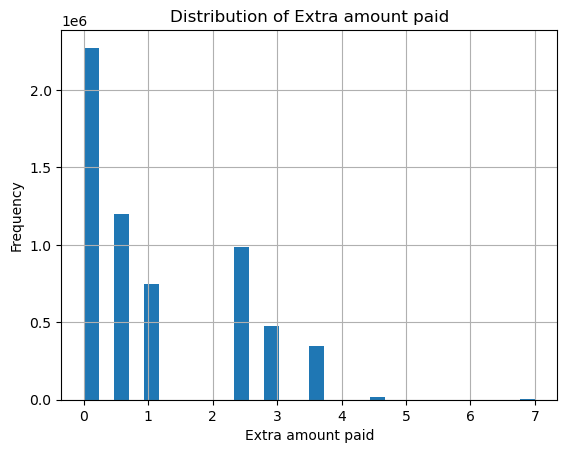

In [28]:
df['trip_distance'].hist(bins=30)
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Distance')
plt.show()

df['fare_amount'].hist(bins=30)
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Fare Amount')
plt.show()

df['duration'].hist(bins=30)
plt.xlabel('Time Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Time Duration')
plt.show()

df['extra'].hist(bins=30)
plt.xlabel('Extra amount paid')
plt.ylabel('Frequency')
plt.title('Distribution of Extra amount paid')
plt.show()

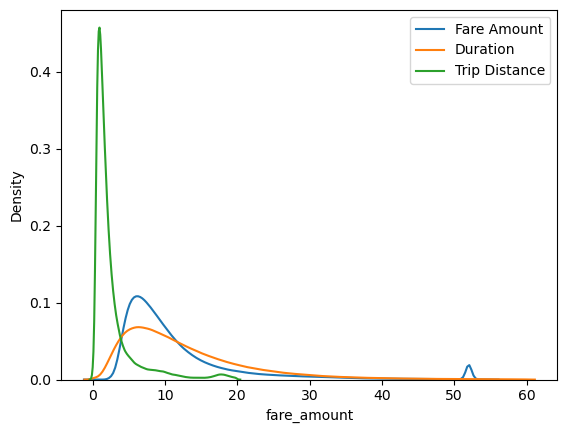

In [36]:
sns.kdeplot(data=df,x='fare_amount', label='Fare Amount')
sns.kdeplot(data=df,x='duration', label='Duration')
sns.kdeplot(data=df,x='trip_distance', label='Trip Distance')
plt.legend()

In [29]:
df=df[df['payment_type']<3]
# will only considering cash and card

In [30]:
df[df.duplicated()]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,duration,times_of_day,pickup_hour,pickup_dayofweek


In [31]:
df=df.drop(['tpep_pickup_datetime','tpep_dropoff_datetime','PULocationID',	'DOLocationID'],axis=1)

<Axes: >

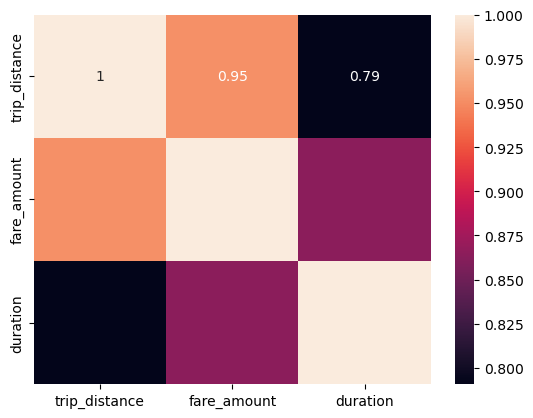

In [32]:
sns.heatmap(df.drop(['RatecodeID','pickup_hour','pickup_dayofweek','payment_type','passenger_count','extra'],axis=1).corr(numeric_only=True),annot=True)

In [33]:
df.head()

,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,duration,times_of_day,pickup_hour,pickup_dayofweek
0,1,1.20,1.0,1,6.0,3.0,4.800000,Night,0,2
1,1,1.20,1.0,1,7.0,3.0,7.416667,Night,0,2
2,1,0.60,1.0,1,6.0,3.0,6.183333,Night,0,2
3,1,0.80,1.0,1,5.5,0.5,4.850000,Night,0,2
5,1,0.03,1.0,2,2.5,0.5,0.883333,Night,0,2


Text(0, 0.5, 'Passenger Frequency')

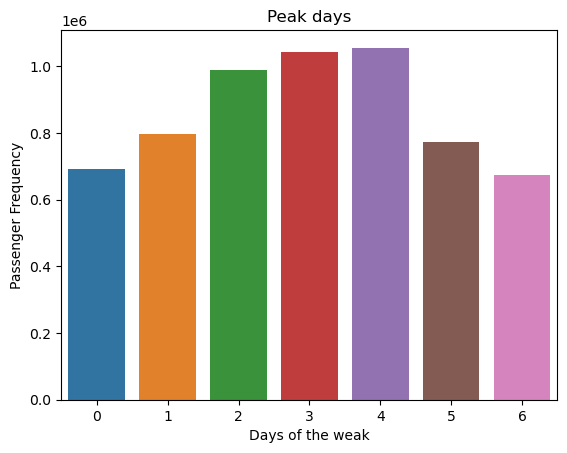

In [118]:
sns.countplot(data=df, x='pickup_dayofweek')
plt.title('Peak days')
plt.xlabel('Days of the weak')
plt.ylabel('Passenger Frequency')

In [ ]:
#Let's check another hypothesis Is there a significant differnce between the avg fare on weekdays and weekends

In [34]:
print ('Average Fare amount on weekends : ',(df[df['pickup_dayofweek']>=5])['fare_amount'].mean()) 
print ('Average Fare amount on weekdays : ',(df[df['pickup_dayofweek']<5])['fare_amount'].mean()) 
print ('Standard Deviation of Fare amount on weekends : ',(df[df['pickup_dayofweek']>=5])['fare_amount'].std()) 
print ('Standard Deviation of Fare amount on weekdays : ',(df[df['pickup_dayofweek']<5])['fare_amount'].std())
print ('Average trip distance on weekends : ',(df[df['pickup_dayofweek']>=5])['trip_distance'].mean()) 
print ('Average trip distance on weekdays : ',(df[df['pickup_dayofweek']<5])['trip_distance'].mean()) 
print ('Standard Deviation of trip distance on weekends : ',(df[df['pickup_dayofweek']>=5])['trip_distance'].std()) 
print ('Standard Deviation of trip distance on weekdays : ',(df[df['pickup_dayofweek']<5])['trip_distance'].std()) 

Average Fare amount on weekends :  11.61382996920735
Average Fare amount on weekdays :  11.783521079011194
Standard Deviation of Fare amount on weekends :  9.275243402586664
Standard Deviation of Fare amount on weekdays :  9.105947470356499
Average trip distance on weekends :  2.7458646507282993
Average trip distance on weekdays :  2.646811119521091
Standard Deviation of trip distance on weekends :  3.254685997192693
Standard Deviation of trip distance on weekdays :  3.155113880483498


In [35]:
weekends_fare=(df[df['pickup_dayofweek']>=5])['fare_amount']
weekdays_fare=(df[df['pickup_dayofweek']<5])['fare_amount']
t_stat,p_val= st.ttest_ind(a=weekdays_fare,b=weekends_fare)
print ('T-stat : ',t_stat,'P-Value :', p_val)

T-stat :  19.443242379535384 P-Value : 3.3446259876724224e-84


In [ ]:
#p-value is too smaller than 0.05, Thus we can reject our null hypothesis
#Our distribution is not perfectly normal let's check with a non-parametric test

In [36]:
stat,p_val= st.mannwhitneyu(x=weekdays_fare,y=weekends_fare)
print ('Statistics=%.3f, p=%.3f' % (stat, p_val))

Statistics=3391659102429.500, p=0.000


In [ ]:
#p-value is too smaller than 0.05, Thus we can reject our null hypothesis

In [ ]:
#Let's check another Hypothesis, Is the fare amount significantly different across differnt times of the day

In [45]:
df.head()

,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,duration,times_of_day,pickup_hour,pickup_dayofweek
0,1,1.20,1.0,1,6.0,3.0,4.800000,Night,0,2
1,1,1.20,1.0,1,7.0,3.0,7.416667,Night,0,2
2,1,0.60,1.0,1,6.0,3.0,6.183333,Night,0,2
3,1,0.80,1.0,1,5.5,0.5,4.850000,Night,0,2
5,1,0.03,1.0,2,2.5,0.5,0.883333,Night,0,2


Text(0, 0.5, 'Fare Amount')

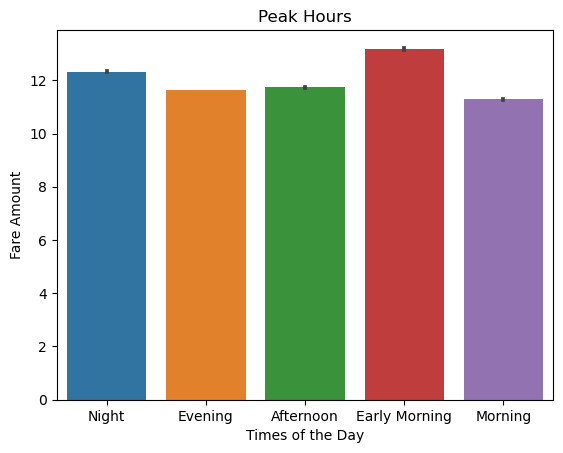

In [44]:
'''sns.countplot(data=df[df['extra']>0], x='times_of_day')
plt.title('Peak Hours')
plt.xlabel('Times of the Day')
plt.ylabel('Passenger Frequency')'''
sns.barplot(data=df, x='times_of_day', y='fare_amount')
plt.title('Peak Hours')
plt.xlabel('Times of the Day')
plt.ylabel('Fare Amount')

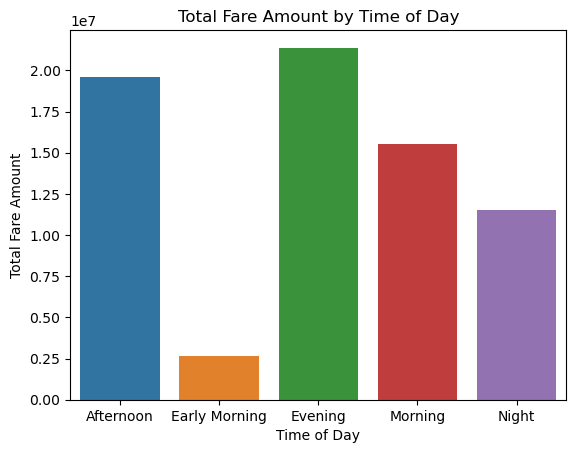

In [48]:
sum_fares = df.groupby('times_of_day')['fare_amount'].sum().reset_index()

# Create the bar plot with summed fare amounts
sns.barplot(data=sum_fares, x='times_of_day', y='fare_amount')
plt.title('Total Fare Amount by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Fare Amount')
plt.show()
#df.groupby('times_of_day')['fare_amount'].sum().reset_index()

In [ ]:
#Let's check another Hypothesis, Is the fare amount significantly different across differnt times of the day

<Axes: xlabel='fare_amount', ylabel='Density'>

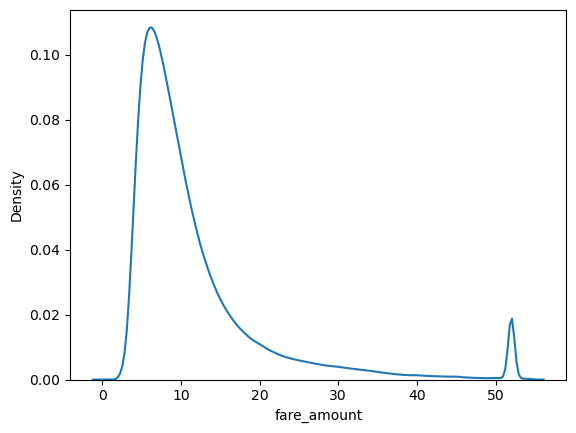

In [89]:
sns.kdeplot(x='fare_amount', data=df)

<Axes: xlabel='times_of_day', ylabel='fare_amount'>

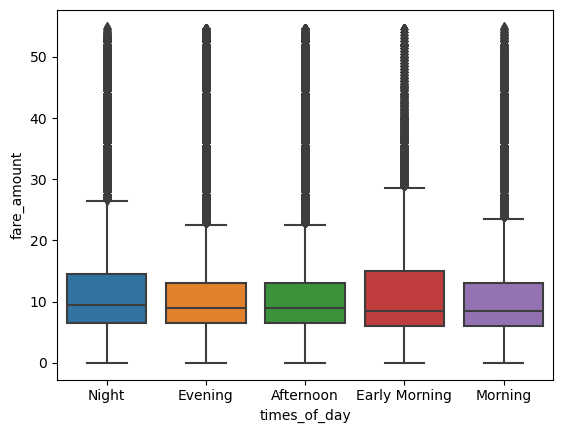

In [90]:
sns.boxplot(x='times_of_day', y='fare_amount', data=df)

In [94]:
early_morning_fare=(df[df['times_of_day']=='Early Morning'])['fare_amount']
morning_fare=(df[df['times_of_day']=='Morning'])['fare_amount']
afternoon_fare=(df[df['times_of_day']=='Afternoon'])['fare_amount']
evening_fare=(df[df['times_of_day']=='Evening'])['fare_amount']
night_fare=(df[df['times_of_day']=='Night'])['fare_amount']

# Let's First calculate the mean of each
print( "Mean of the fare in Early morning :", early_morning_fare.mean())
print( "Mean of the fare in Morning :", morning_fare.mean())
print( "Mean of the fare in Afternoon :", afternoon_fare.mean())
print( "Mean of the fare in Evening :", evening_fare.mean())
print( "Mean of the fare in Night :", night_fare.mean())


#import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('fare_amount ~ C(times_of_day)', data=df).fit()

# Perform ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

#f-value is too high and p-value is less than 0.05 thus we can reject the null

Mean of the fare in Early morning : 13.171382056918667
Mean of the fare in Morning : 11.292646654535462
Mean of the fare in Afternoon : 11.731763830976494
Mean of the fare in Evening : 11.639053085976203
Mean of the fare in Night : 12.318163724572049
                       sum_sq         df            F  PR(>F)
C(times_of_day)  1.022310e+06        4.0  3060.790561     0.0
Residual         5.029268e+08  6023040.0          NaN     NaN


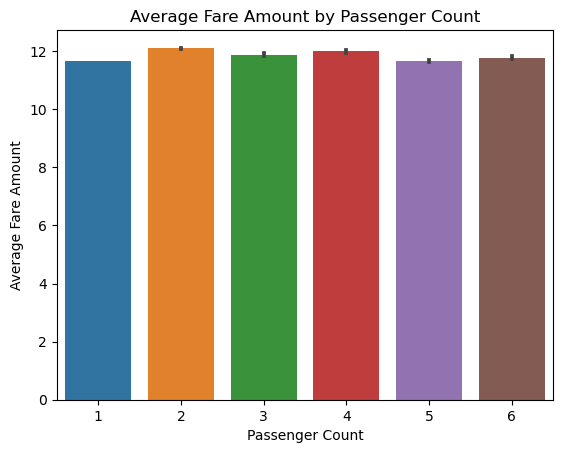

In [84]:
sns.barplot(data=df, x='passenger_count', y='fare_amount')
plt.title('Average Fare Amount by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare Amount')
plt.show()
# As we can see there is not much difference in fares based on passenger counts

In [37]:
#Checking is any particular time of the daya we are getting more extras
#df.groupby('times_of_day').sum()['extra']
df[['pickup_dayofweek','extra']].groupby('pickup_dayofweek').sum()['extra']
#df['pickup_dayofweek'].value_counts()

pickup_dayofweek
0     756655.20
1     917920.20
2    1106943.92
3    1206434.50
4    1227743.22
5     690928.67
6     590270.70
Name: extra, dtype: float64

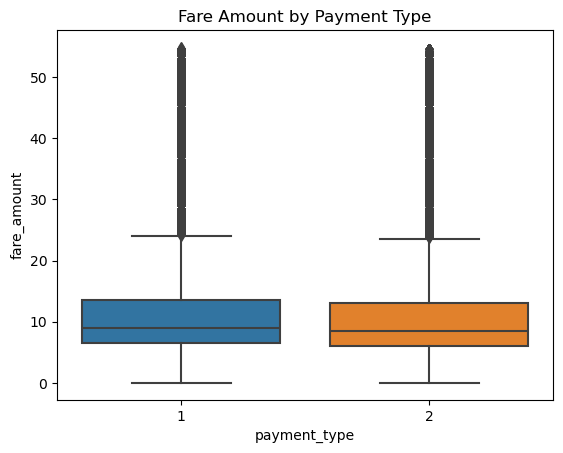

In [49]:
sns.boxplot(x='payment_type', y='fare_amount', data=df)
plt.title('Fare Amount by Payment Type')
plt.show()

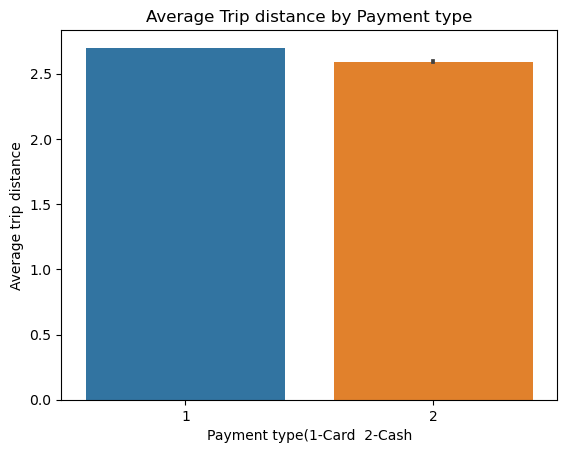

In [66]:
sns.barplot(data=df, x='payment_type', y='trip_distance')
plt.title('Average Trip distance by Payment type')
plt.xlabel('Payment type(1-Card  2-Cash)')
plt.ylabel('Average trip distance')
plt.show()

In [42]:
#df=df.drop(['RatecodeID', 'extra'],axis=1)
df.head()

,passenger_count,trip_distance,payment_type,fare_amount,duration,times_of_day,pickup_hour,pickup_dayofweek
0,1,1.20,1,6.0,4.800000,Night,0,2
1,1,1.20,1,7.0,7.416667,Night,0,2
2,1,0.60,1,6.0,6.183333,Night,0,2
3,1,0.80,1,5.5,4.850000,Night,0,2
5,1,0.03,2,2.5,0.883333,Night,0,2


In [61]:
'''df_test=pd.get_dummies(data=df, columns=['payment_type', 'times_of_day', 'pickup_dayofweek'],drop_first=True)
df_test[['payment_type_2',	'times_of_day_Early Morning',	'times_of_day_Evening',	'times_of_day_Morning',	'times_of_day_Night',	'pickup_dayofweek_1',	'pickup_dayofweek_2',	'pickup_dayofweek_3'	,'pickup_dayofweek_4',	'pickup_dayofweek_5',	'pickup_dayofweek_6']]=df_test[['payment_type_2',	'times_of_day_Early Morning',	'times_of_day_Evening',	'times_of_day_Morning',	'times_of_day_Night',	'pickup_dayofweek_1',	'pickup_dayofweek_2',	'pickup_dayofweek_3'	,'pickup_dayofweek_4',	'pickup_dayofweek_5',	'pickup_dayofweek_6']].applymap({False: 0, True: 1}.get)
df_test.head()'''
df_test.columns

Index(['passenger_count', 'trip_distance', 'fare_amount', 'duration',
       'pickup_hour', 'payment_type_2', 'times_of_day_Early Morning',
       'times_of_day_Evening', 'times_of_day_Morning', 'times_of_day_Night',
       'pickup_dayofweek_1', 'pickup_dayofweek_2', 'pickup_dayofweek_3',
       'pickup_dayofweek_4', 'pickup_dayofweek_5', 'pickup_dayofweek_6'],
      dtype='object')

In [67]:
X = df_test[['passenger_count', 'trip_distance','duration', 'payment_type_2', 'times_of_day_Early Morning',
       'times_of_day_Evening', 'times_of_day_Morning', 'times_of_day_Night',
       'pickup_dayofweek_1', 'pickup_dayofweek_2', 'pickup_dayofweek_3',
       'pickup_dayofweek_4', 'pickup_dayofweek_5', 'pickup_dayofweek_6']]
X = sm.add_constant(X)
y = df['fare_amount']



# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

'''# Fit the model using formulas
model_formula = smf.ols('dependent_var ~ independent_var1 + independent_var2 + independent_var3', data=df).fit()

# Generate ANOVA table
anova_table = sm.stats.anova_lm(model_formula, typ=2)
print(anova_table)'''

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 6.787e+06
Date:                Tue, 30 Jul 2024   Prob (F-statistic):               0.00
Time:                        01:38:33   Log-Likelihood:            -1.3386e+07
No. Observations:             6023045   AIC:                         2.677e+07
Df Residuals:                 6023030   BIC:                         2.677e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

"# Fit the model using formulas\nmodel_formula = smf.ols('dependent_var ~ independent_var1 + independent_var2 + independent_var3', data=df).fit()\n\n# Generate ANOVA table\nanova_table = sm.stats.anova_lm(model_formula, typ=2)\nprint(anova_table)"

In [ ]:
# Will check for multicollinearity

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data
#No problem of multicollinearity

,feature,VIF
0,const,15.870432
1,passenger_count,1.002672
2,trip_distance,2.839510
3,duration,2.832703
4,payment_type_2,1.005638
5,times_of_day_Early Morning,1.114128
6,times_of_day_Evening,1.469124
7,times_of_day_Morning,1.413922
8,times_of_day_Night,1.365427
9,pickup_dayofweek_1,1.868959


In [ ]:
#Will create a ML model for the prediction of Fare amount on the basis of other features

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [70]:
X= df_test[['passenger_count', 'trip_distance','duration', 'payment_type_2', 'times_of_day_Early Morning',
       'times_of_day_Evening', 'times_of_day_Morning', 'times_of_day_Night',
       'pickup_dayofweek_1', 'pickup_dayofweek_2', 'pickup_dayofweek_3',
       'pickup_dayofweek_4', 'pickup_dayofweek_5', 'pickup_dayofweek_6']]
y=df_test['fare_amount']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [73]:
scaler=StandardScaler()
X_train[['trip_distance','duration','passenger_count']]=scaler.fit_transform(X_train[['trip_distance','duration','passenger_count']])
X_test[['trip_distance','duration','passenger_count']]=scaler.transform(X_test[['trip_distance','duration','passenger_count']])

In [74]:
X_train.head()

,passenger_count,trip_distance,duration,payment_type_2,times_of_day_Early Morning,times_of_day_Evening,times_of_day_Morning,times_of_day_Night,pickup_dayofweek_1,pickup_dayofweek_2,pickup_dayofweek_3,pickup_dayofweek_4,pickup_dayofweek_5,pickup_dayofweek_6
3570172,-0.475931,0.204752,0.172692,0,0,1,0,0,0,0,0,0,1,0
2732507,-0.475931,-0.368058,-0.487570,0,0,0,1,0,0,1,0,0,0,0
4458952,-0.475931,0.258256,0.817689,0,0,0,0,0,0,0,1,0,0,0
5927235,-0.475931,0.673701,1.430245,1,0,0,1,0,0,0,1,0,0,0
3490879,1.266485,-0.242165,-0.046759,1,0,0,0,0,0,0,0,0,1,0


<Axes: xlabel='fare_amount', ylabel='trip_distance'>

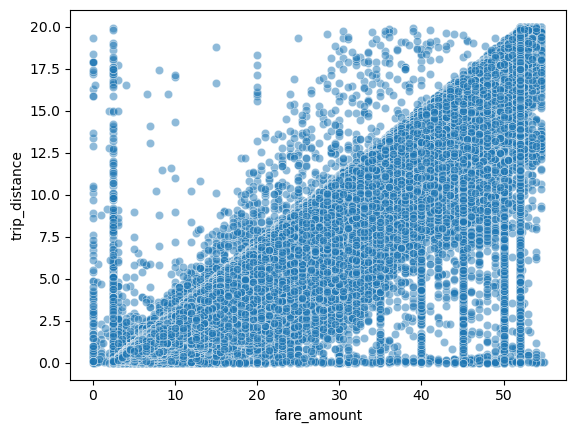

In [79]:
sns.scatterplot(data=df,x='fare_amount', y='trip_distance', alpha=0.5)

<Axes: xlabel='fare_amount', ylabel='duration'>

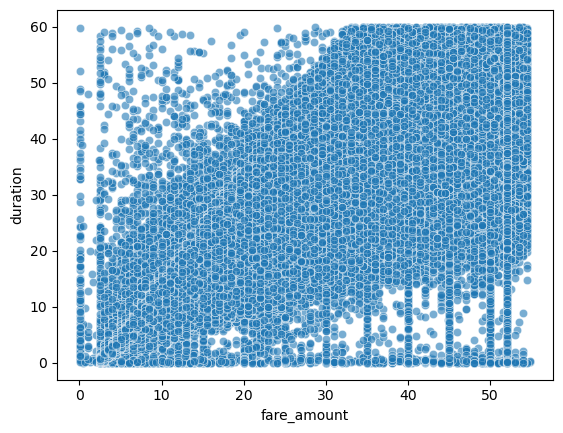

In [81]:
sns.scatterplot(data=df,x='fare_amount', y='duration', alpha=0.6)

In [75]:
# Linear Regression
model=LinearRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
print (mean_absolute_error(y_test,pred))
print (np.sqrt(mean_squared_error(y_test,pred)))
df_test['fare_amount'].mean()

0.5742320150916032
2.2352030077546328


11.742805941180919

In [ ]:
# We can also predict duration from other features like distance, times_of_day e.t.c
# We have also found which is the most influential feature on fare amount